<a href="https://colab.research.google.com/github/Computational-Tools-in-DS-G42/footballer-profiler-AI/blob/Zahed/player_profiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy._core.fromnumeric import shape
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_samples

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

## **Data Import**:

In [174]:
#init_df = pd.read_csv("data2.csv", encoding="latin1", sep=",")
url = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/data.csv"
init_df = pd.read_csv(url, encoding="latin1", sep=",")
print("Shape" + str(init_df.shape))

Shape(71584, 38)


In [175]:
url2 = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/players.csv"
init_df2 = pd.read_csv(url2, encoding="latin1", sep=",")
print("Shape" + str(init_df2.shape))

Shape(32601, 23)


In [176]:
url3 = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/extra_player_attributes.csv"
extra_att_df = pd.read_csv(url3, encoding="latin1", sep=",")
print("Shape" + str(extra_att_df.shape))

Shape(31771, 5)


## **Exploratory Data Analysis**


In [177]:
display(init_df.columns)


Index(['name', 'club', 'age', 'position', 'apps', 'mins', 'goals', 'assists',
       'yel', 'red', 'shots', 'ps%', 'aerials_won', 'motm', 'rating',
       'tackles', 'interceptions', 'fouls', 'offsides_won', 'clearances',
       'dribbled', 'blocks', 'own_goals', 'key_passes', 'dribblings', 'fouled',
       'offsides', 'dispossed', 'bad_controls', 'avg_passes', 'crosses',
       'long_passes', 'through_passes', 'league', 'season', 'fee', 'traded',
       'club_position'],
      dtype='object')

In [178]:
print('Info:')
init_df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71584 entries, 0 to 71583
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            71584 non-null  object 
 1   club            71584 non-null  object 
 2   age             71584 non-null  int64  
 3   position        71584 non-null  object 
 4   apps            71584 non-null  object 
 5   mins            71584 non-null  int64  
 6   goals           71584 non-null  object 
 7   assists         71584 non-null  object 
 8   yel             71584 non-null  object 
 9   red             71584 non-null  object 
 10  shots           71584 non-null  object 
 11  ps%             71584 non-null  object 
 12  aerials_won     71584 non-null  object 
 13  motm            71584 non-null  object 
 14  rating          71584 non-null  float64
 15  tackles         71528 non-null  object 
 16  interceptions   71528 non-null  object 
 17  fouls           71528 non

In [179]:
init_df['season'].unique().tolist()

['2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [180]:
init_df['position'].unique().tolist()

['FW',
 'M(CLR)',
 'D(C)',
 'M(C)',
 'Midfielder',
 'M(CL)',
 'M(R)',
 'M(CR)',
 'DMC',
 'D(CL)',
 'GK',
 'D(L)',
 'D(R)',
 'M(L)',
 'D(CLR)',
 'AM(L)',
 'M(LR)',
 'D(CR)',
 'AM(CLR)',
 'AM(C)',
 'AM(LR)',
 'AM(CL)',
 'AM(CR)',
 'Forward',
 'AM(R)',
 'Defender',
 'Goalkeeper',
 'midfielder',
 'D(LR)',
 'forward']

In [181]:
display(init_df.head(10))

,name,club,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded,club_position
0,Arjen Robben,Bayern,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.18,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0,1
1,Arjen Robben,Bayern,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.18,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0,1
2,Stefan Kieling,Leverkusen,26,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.79,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0,4
3,Stefan Kieling,Leverkusen,26,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.79,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0,4
4,Zvjezdan Misimovic,Wolfsburg,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.74,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,â¬8.50m,1,8
5,Zvjezdan Misimovic,Wolfsburg,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.74,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,â¬8.50m,1,8
6,Edin Dzeko,Wolfsburg,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.73,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0,8
7,Edin Dzeko,Wolfsburg,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.73,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0,8
8,Claudio Pizarro,Werder Bremen,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.63,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0,3
9,Claudio Pizarro,Werder Bremen,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.63,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0,3


In [182]:
#init_df = init_df.replace("-", np.nan)
#init_df['bad_controls'].isna().sum()

In [183]:
#display(init_df.head(10))

In [184]:
# Note that there might a character instead of Nan
init_df.isna().all()


,0
name,False
club,False
age,False
position,False
apps,False
mins,False
goals,False
assists,False
yel,False
red,False


## **Data Preprocessing**:


### Removing unnacesarry the columns & Filtering out players that played less than 90 mins.

In [185]:
# Removing unnacesarry the columns

print("Shape: " + str(init_df.shape))
#cols_to_drop = ["club", "motm", "rating", "offsides_won", "league",  "fee", "traded", "club_position"]
# TODO
cols_to_drop = ["club", "motm", "offsides_won", "league",  "fee", "traded", "club_position"]

df_clean = init_df.drop(columns=cols_to_drop)
print("Shape: " + str(df_clean.shape))

Shape: (71584, 38)
Shape: (71584, 31)


In [186]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
df_clean = df_clean[df_clean["mins"] >= 90]
print("After: " + str(df_clean["mins"].min()) + "mins")
print("Shape: " + str(df_clean.shape))


Before: 1mins
After: 90mins
Shape: (63786, 31)


In [187]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_clean.head(2)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010


###Removing duplicates

In [188]:
# Removing duplicates
print("Before: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))
df_clean = df_clean.drop_duplicates()
print("After: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))


Before: Duplicates: 32015, Shape: (63786, 31)
After: Duplicates: 0, Shape: (31771, 31)


In [189]:
# Resets the ordering
df_clean = df_clean.reset_index(drop=True)
df_clean.head(5)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010
3,Edin Dzeko,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,7.73,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010
4,Claudio Pizarro,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010


In [190]:
dupes = df_clean[df_clean.duplicated(subset=["name", "season"], keep=False)]
dupes_sorted = dupes.sort_values(by=["name", "season"])

print(f"Remaining duplicates (same name & same season): {len(dupes_sorted)}")
dupes_sorted.head(10)


Remaining duplicates (same name & same season): 2488


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
21326,Aaron Lennon,28,M(LR),12(2),1072,2,-,2,-,0.5,78,0.2,6.81,1.9,0.7,0.8,0.7,1.1,-,-,1.1,0.6,1.4,0.1,1.1,1,23.4,0.3,0.7,0.1,2014/2015
21507,Aaron Lennon,28,M(LR),3(6),276,-,2,1,-,0.2,85.2,-,6.42,1.1,0.3,0.4,0.2,0.2,-,-,1,0.2,0.3,-,0.7,0.2,12,0.3,0.1,0.1,2014/2015
22879,Aaron Lennon,31,M(LR),13(1),1125,-,2,2,-,0.7,70.8,0.5,6.58,1.4,0.6,0.7,0.6,1.3,0.4,-,0.5,0.7,0.9,0.1,1.6,0.6,19.6,0.4,0.4,-,2017/2018
22973,Aaron Lennon,31,M(LR),9(6),795,-,-,-,-,0.3,69.1,0.3,6.36,1.1,0.7,0.7,0.5,1.1,0.1,-,0.3,0.3,0.5,-,0.7,0.7,12.9,0.1,0.2,-,2017/2018
5108,Aaron Martin,24,M(L),3(2),261,-,-,-,-,0.2,73.5,0.2,6.23,0.6,0.4,0.8,0.4,0.4,-,-,0.6,0.6,-,-,0.4,0.6,22.6,0.8,1.4,-,2020/2021
11348,Aaron Martin,24,M(L),17(2),1540,-,3,1,-,0.3,82.3,0.8,6.58,1.8,0.7,1.3,1.8,1.2,0.2,-,0.3,0.9,0.8,0.2,0.4,0.7,35.4,0.2,1.1,-,2020/2021
15403,Abdelhamid El Kaoutari,26,D(CL),7(1),644,-,-,-,-,0.3,78,1,6.67,0.9,2.3,0.8,3.6,0.4,0.8,-,0.3,0.3,1,-,0.3,0.4,35.8,0.1,2.8,0.1,2015/2016
28187,Abdelhamid El Kaoutari,26,D(CL),7,630,1,-,2,-,0.1,82.7,0.9,7.06,3.1,2.6,0.4,2.9,0.9,0.7,-,0.3,0.6,0.7,-,0.4,0.3,36.4,-,2,-,2015/2016
6954,Abdelkader Ghezzal,28,FW,9(7),854,2,2,1,-,1.3,72.4,0.8,6.66,0.5,0.9,1.3,0.6,0.1,0.1,-,0.5,0.7,0.8,0.8,0.7,0.9,15.4,0.3,0.4,0.1,2011/2012
26427,Abdelkader Ghezzal,28,FW,10(3),758,-,-,4,-,0.5,74.3,1.1,6.34,0.9,0.8,1.8,1.6,0.6,0.2,-,0.7,0.3,0.8,0.1,1.9,1.3,18.8,0.5,1.4,0.1,2011/2012


###Adding height and foot attributes


In [191]:
display(extra_att_df.head(10))

,name,matched_name,match_score,height,preferred_foot
0,Arjen Robben,arjen robben,100.000000,180.0,left
1,Stefan Kieling,stefan kiealing,96.551724,191.0,right
2,Zvjezdan Misimovic,zvjezdan misimovic,100.000000,179.0,both
3,Edin Dzeko,NaN,0.000000,NaN,NaN
4,Claudio Pizarro,claudio pizarro,100.000000,184.0,right
5,Paolo Guerrero,NaN,0.000000,NaN,NaN
6,Mesut Ozil,mesut azil,90.000000,180.0,left
7,Naldo,naldo,100.000000,198.0,right
8,Toni Kroos,toni kroos,100.000000,183.0,right
9,Raffael,raffael,100.000000,174.0,right


In [192]:
print(df_clean.shape)
print(extra_att_df.shape)

(31771, 31)
(31771, 5)


In [193]:
(df_clean['name'] == extra_att_df['name']).all()


np.True_

In [194]:
df_clean['height'] = extra_att_df['height'].values
df_clean['foot'] = extra_att_df['preferred_foot'].values


In [195]:
display(df_clean.head(5))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,right
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,both
3,Edin Dzeko,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,7.73,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010,NaN,NaN
4,Claudio Pizarro,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,right


Missing items: 1922


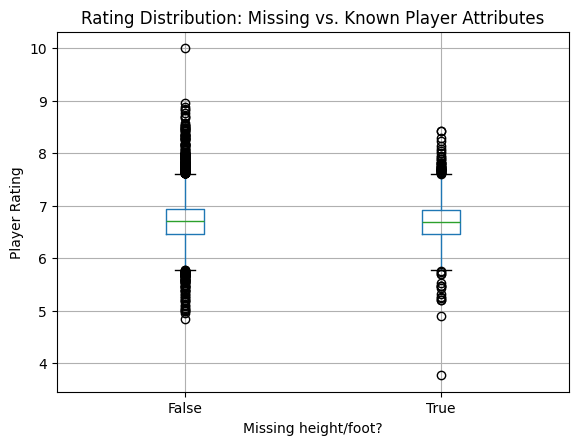

In [196]:

# Analysis of the players that do not have either "foot" or "height"
missing_players = df_clean[df_clean['height'].isna() | df_clean['foot'].isna()]

missing_players = missing_players.drop_duplicates(subset=['name'])

print("Missing items: " + str(missing_players.shape[0]))

#df_clean['missing_info'] = df_clean['name'].isin(missing_players['name'])
df_copy = df_clean.copy()
df_copy['missing_info'] = df_copy['name'].isin(missing_players['name'])


df_copy.boxplot(column='rating', by='missing_info')
plt.title("Rating Distribution: Missing vs. Known Player Attributes")
plt.suptitle("")
plt.xlabel("Missing height/foot?")
plt.ylabel("Player Rating")
plt.show()


In [197]:
display(df_clean.head(1))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left


In [198]:
# Removing players that do not have either "height" or "foot" attribute

before = df_clean.shape[0]
df_clean = df_clean.dropna(subset=['height', 'foot'])
df_clean = df_clean.reset_index(drop=True)

print(f"Removed {before - df_clean.shape[0]} players")

#df_clean[["name", "height", "foot"]].head(5)

Removed 5715 players


In [199]:
df_clean[["name", "height", "foot"]].head(10)


,name,height,foot
0,Arjen Robben,180.0,left
1,Stefan Kieling,191.0,right
2,Zvjezdan Misimovic,179.0,both
3,Claudio Pizarro,184.0,right
4,Mesut Ozil,180.0,left
5,Naldo,198.0,right
6,Toni Kroos,183.0,right
7,Raffael,174.0,right
8,Nuri Sahin,180.0,left
9,Lucas Barrios,189.0,right


### Filtering out (again)

In [200]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
val1 = df_clean.shape[0]
df_clean = df_clean[df_clean["mins"] >= 400]
print("After: " + str(df_clean["mins"].min()) + "mins")
print(f"Removed players: {val1 - df_clean.shape[0]}")

Before: 90mins
After: 400mins
Removed players: 4365


In [201]:
print("Before min rating: " + str(df_clean["rating"].min()))
val1 = df_clean.shape[0]
df_clean = df_clean[df_clean["rating"] >= 7]
print("After min rating: " + str(df_clean["rating"].min()))
print(f"Removed players: {val1 - df_clean.shape[0]}, Total player: {df_clean.shape[0]}")

Before min rating: 5.8
After min rating: 7.0
Removed players: 16922, Total player: 4769


### Removing substitute data & Cleaning up duplicate positions.



In [202]:
# Removing substitute data
df_clean['apps'] = df_clean['apps'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Renaming column
df_clean = df_clean.rename(columns={'dispossed': 'poss_losses'})

display(df_clean.head(5))


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18,1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,right
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,both
3,Claudio Pizarro,32,FW,23,2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,right
4,Mesut Ozil,22,M(CLR),29,2601,9,13,2,-,2.2,82.5,0.1,7.62,0.7,0.8,0.7,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,2009/2010,180.0,left


In [203]:
# Cleaning up duplicate positions

df_clean['position'] = df_clean['position'].replace({
    'Goalkeeper': 'GK',
    'Forward': 'FW',
    'forward': 'FW',
    'Midfielder': 'M',
    'midfielder': 'M',
    'Defender': 'D',

    'AM(C)': "AM",
    'AM(CL)': "AM",
    'AM(CLR)': "AM",
    'AM(CR)': "AM",
    'AM(L)': "AM",
    'AM(LR)': "AM",
    'AM(R)': "AM",

    'D(C)': "D",
    'D(CL)': "D",
    'D(CLR)': "D",
    'D(CR)': "D",
    'D(L)': "D",
    'D(LR)': "D",
    'D(R)': "D",

    'M(C)': "M",
    'M(CL)': "M",
    'M(CLR)': "M",
    'M(CR)': "M",
    'M(L)': "M",
    'M(LR)': "M",
    'M(R)': "M"

})

#df_clean['position'].unique().tolist()
list(sorted(df_clean['position'].unique()))


['AM', 'D', 'DMC', 'FW', 'GK', 'M']

### Encoding features

In [204]:
df_clean["foot"].unique().tolist()

['left', 'right', 'both']

In [205]:
df_clean = pd.get_dummies(df_clean, columns=['foot'], prefix='foot', dtype=int)

In [206]:
display(df_clean.head(5))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot_both,foot_left,foot_right
0,Arjen Robben,26,FW,18,1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,0,1,0
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,0,0,1
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,1,0,0
3,Claudio Pizarro,32,FW,23,2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,0,0,1
4,Mesut Ozil,22,M,29,2601,9,13,2,-,2.2,82.5,0.1,7.62,0.7,0.8,0.7,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,2009/2010,180.0,0,1,0


### Converting columns into float


In [207]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 25610
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            4769 non-null   object 
 1   age             4769 non-null   int64  
 2   position        4769 non-null   object 
 3   apps            4769 non-null   object 
 4   mins            4769 non-null   int64  
 5   goals           4769 non-null   object 
 6   assists         4769 non-null   object 
 7   yel             4769 non-null   object 
 8   red             4769 non-null   object 
 9   shots           4769 non-null   object 
 10  ps%             4769 non-null   object 
 11  aerials_won     4769 non-null   object 
 12  rating          4769 non-null   float64
 13  tackles         4769 non-null   object 
 14  interceptions   4769 non-null   object 
 15  fouls           4769 non-null   object 
 16  clearances      4769 non-null   object 
 17  dribbled        4769 non-null   objec

In [208]:
# Converting columns into float

cols = ['age','apps', 'mins', 'goals', 'assists', 'yel',
       'red', 'shots', 'ps%', 'aerials_won', 'tackles', 'interceptions',
       'fouls', 'clearances', 'dribbled', 'blocks', 'own_goals', 'key_passes',
       'dribblings', 'fouled', 'offsides', 'poss_losses', 'bad_controls',
       'avg_passes', 'crosses', 'long_passes', 'through_passes', "foot_both",
        "foot_left", "foot_right"]

for curr in cols:
  df_clean[curr] = pd.to_numeric(df_clean[curr], errors='coerce').fillna(0)

df_clean[cols] = df_clean[cols].astype(float)

In [209]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 25610
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            4769 non-null   object 
 1   age             4769 non-null   float64
 2   position        4769 non-null   object 
 3   apps            4769 non-null   float64
 4   mins            4769 non-null   float64
 5   goals           4769 non-null   float64
 6   assists         4769 non-null   float64
 7   yel             4769 non-null   float64
 8   red             4769 non-null   float64
 9   shots           4769 non-null   float64
 10  ps%             4769 non-null   float64
 11  aerials_won     4769 non-null   float64
 12  rating          4769 non-null   float64
 13  tackles         4769 non-null   float64
 14  interceptions   4769 non-null   float64
 15  fouls           4769 non-null   float64
 16  clearances      4769 non-null   float64
 17  dribbled        4769 non-null   float

### Converting attributes per game to per 90 minnutes

In [210]:
display(df_clean.head(4))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot_both,foot_left,foot_right
0,Arjen Robben,26.0,FW,18.0,1779.0,16.0,6.0,1.0,0.0,3.4,80.2,0.4,8.18,0.6,0.5,0.9,0.0,0.7,0.0,0.0,1.8,4.0,2.2,0.3,2.1,0.0,34.3,1.5,2.0,0.2,2009/2010,180.0,0.0,1.0,0.0
1,Stefan Kieling,26.0,FW,33.0,2924.0,21.0,5.0,3.0,0.0,3.0,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,0.0,1.6,1.1,3.1,1.8,2.2,0.0,32.5,0.2,0.4,0.1,2009/2010,191.0,0.0,0.0,1.0
2,Zvjezdan Misimovic,28.0,FW,31.0,2768.0,10.0,13.0,7.0,0.0,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,0.0,3.3,1.5,2.1,0.3,3.1,0.0,51.1,2.5,5.7,0.5,2009/2010,179.0,1.0,0.0,0.0
3,Claudio Pizarro,32.0,FW,23.0,2130.0,16.0,2.0,4.0,0.0,2.6,75.5,0.4,7.63,1.0,0.7,2.0,0.7,0.4,0.2,0.0,1.3,1.2,1.2,1.4,3.1,0.0,24.2,0.1,0.8,0.0,2009/2010,184.0,0.0,0.0,1.0


In [211]:
# Converting attributes "goals" and "assists" to per 90 minutes.

df_clean['goals_p90'] = df_clean['goals'] / (df_clean['mins'] / 90)
df_clean['assists_p90'] = df_clean['assists'] / (df_clean['mins'] / 90)

df_clean = df_clean.drop(columns=["goals", "assists"])

In [212]:
# Converting per-game attributes to per 90 minnutes.

cols = ["yel", "red", "shots", "aerials_won", "tackles",  "interceptions",
        "fouls", "clearances", "dribbled", "blocks", "own_goals", "key_passes",
        "dribblings", "fouled",  "offsides", "poss_losses", "bad_controls",
        "avg_passes", "crosses", "long_passes", "through_passes"]


for curr in cols:
    total_mins = df_clean["mins"]
    total_val = df_clean[curr] * df_clean["apps"]
    df_clean[curr + "_p90"] = total_val / ( total_mins / 90)


df_clean = df_clean.drop(columns=cols)


In [213]:
display(df_clean.head(10))

,name,age,position,apps,mins,ps%,rating,season,height,foot_both,foot_left,foot_right,goals_p90,assists_p90,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90
0,Arjen Robben,26.0,FW,18.0,1779.0,80.2,8.18,2009/2010,180.0,0.0,1.0,0.0,0.809444,0.303541,0.910624,0.0,3.096121,0.364250,0.546374,0.455312,0.819562,0.000000,0.637437,0.000000,0.0,1.639123,3.642496,2.003373,0.273187,1.912310,0.0,31.234401,1.365936,1.821248,0.182125
1,Stefan Kieling,26.0,FW,33.0,2924.0,72.4,7.79,2009/2010,191.0,0.0,0.0,1.0,0.646375,0.153899,3.047196,0.0,3.047196,2.133037,1.218878,0.711012,2.539330,0.304720,0.507866,0.101573,0.0,1.625171,1.117305,3.148769,1.828317,2.234610,0.0,33.011286,0.203146,0.406293,0.101573
2,Zvjezdan Misimovic,28.0,FW,31.0,2768.0,77.5,7.74,2009/2010,179.0,1.0,0.0,0.0,0.325145,0.422688,7.055636,0.0,2.419075,0.201590,1.915101,0.604769,1.511922,0.201590,1.209538,0.100795,0.0,3.326228,1.511922,2.116691,0.302384,3.124639,0.0,51.506142,2.519870,5.745303,0.503974
3,Claudio Pizarro,32.0,FW,23.0,2130.0,75.5,7.63,2009/2010,184.0,0.0,0.0,1.0,0.676056,0.084507,3.887324,0.0,2.526761,0.388732,0.971831,0.680282,1.943662,0.680282,0.388732,0.194366,0.0,1.263380,1.166197,1.166197,1.360563,3.012676,0.0,23.518310,0.097183,0.777465,0.000000
4,Mesut Ozil,22.0,M,29.0,2601.0,82.5,7.62,2009/2010,180.0,0.0,1.0,0.0,0.311419,0.449827,2.006920,0.0,2.207612,0.100346,0.702422,0.802768,0.702422,0.000000,0.702422,0.000000,0.0,3.010381,2.307958,1.404844,0.501730,2.910035,0.0,35.020761,2.107266,1.404844,0.100346
5,Naldo,28.0,D,31.0,2762.0,83.1,7.59,2009/2010,198.0,0.0,0.0,1.0,0.162925,0.065170,5.050688,0.0,2.020275,1.313179,2.727371,3.737509,1.414193,3.333454,0.707096,0.606083,0.0,0.404055,0.707096,1.010138,0.101014,0.303041,0.0,51.314989,0.000000,3.737509,0.000000
6,Toni Kroos,20.0,M,26.0,2360.0,82.2,7.59,2009/2010,183.0,0.0,0.0,1.0,0.343220,0.343220,5.949153,0.0,2.181356,0.198305,1.388136,0.991525,0.892373,0.297458,0.793220,0.099153,0.0,2.379661,1.189831,2.181356,0.099153,0.892373,0.0,36.884746,1.487288,2.776271,0.297458
7,Raffael,25.0,FW,30.0,2654.0,84.1,7.56,2009/2010,174.0,0.0,0.0,1.0,0.237378,0.135644,9.155991,0.0,2.441598,0.305200,1.932931,1.424265,1.220799,0.305200,1.119066,0.000000,0.0,2.339864,3.051997,2.441598,0.305200,2.950264,0.0,40.184627,1.627732,2.339864,0.101733
8,Nuri Sahin,22.0,M,33.0,2904.0,76.5,7.51,2009/2010,180.0,0.0,1.0,0.0,0.123967,0.216942,5.113636,0.0,1.431818,0.511364,3.477273,2.556818,1.534091,1.022727,1.840909,0.204545,0.0,2.556818,0.818182,1.022727,0.204545,0.818182,0.0,56.454545,1.534091,5.931818,0.306818
9,Lucas Barrios,26.0,FW,30.0,2623.0,69.3,7.45,2009/2010,189.0,0.0,0.0,1.0,0.651925,0.137247,6.176134,0.0,3.088067,1.338162,0.926420,0.514678,2.161647,1.235227,0.617613,0.000000,0.0,1.338162,0.926420,1.646969,1.441098,2.264583,0.0,21.719405,0.102936,0.720549,0.102936


### Finding highly correlated features and deleting them

In [214]:
display(df_clean.columns)

Index(['name', 'age', 'position', 'apps', 'mins', 'ps%', 'rating', 'season',
       'height', 'foot_both', 'foot_left', 'foot_right', 'goals_p90',
       'assists_p90', 'yel_p90', 'red_p90', 'shots_p90', 'aerials_won_p90',
       'tackles_p90', 'interceptions_p90', 'fouls_p90', 'clearances_p90',
       'dribbled_p90', 'blocks_p90', 'own_goals_p90', 'key_passes_p90',
       'dribblings_p90', 'fouled_p90', 'offsides_p90', 'poss_losses_p90',
       'bad_controls_p90', 'avg_passes_p90', 'crosses_p90', 'long_passes_p90',
       'through_passes_p90'],
      dtype='object')

In [215]:
numeric_df = df_clean.select_dtypes(include='number')
corr = numeric_df.corr()

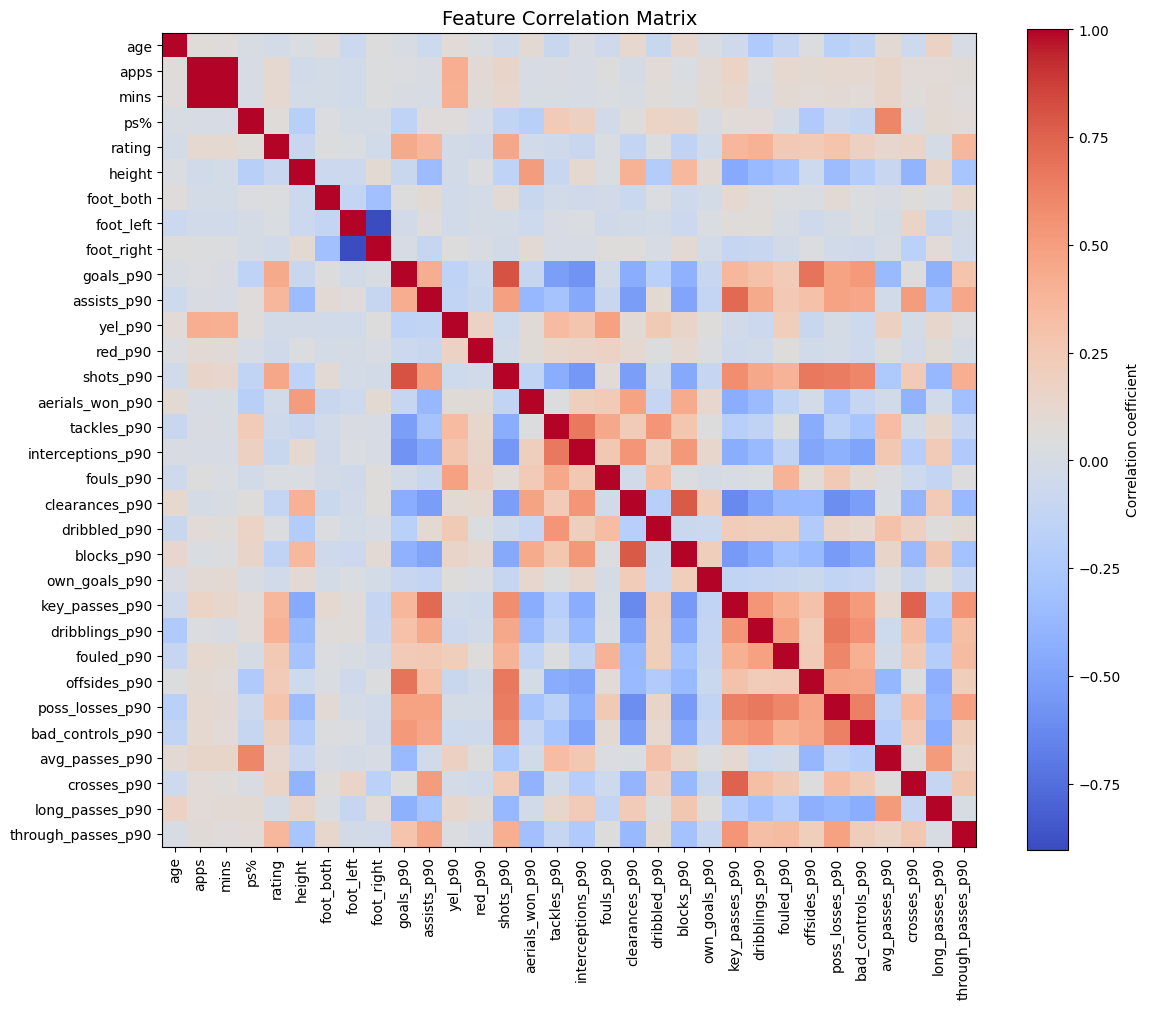

In [216]:

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation coefficient')
plt.title("Feature Correlation Matrix", fontsize=14)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


Highly correlated features: ['apps', 'foot_right', 'mins', 'blocks_p90', 'crosses_p90', 'shots_p90', 'clearances_p90', 'key_passes_p90', 'foot_left', 'goals_p90']


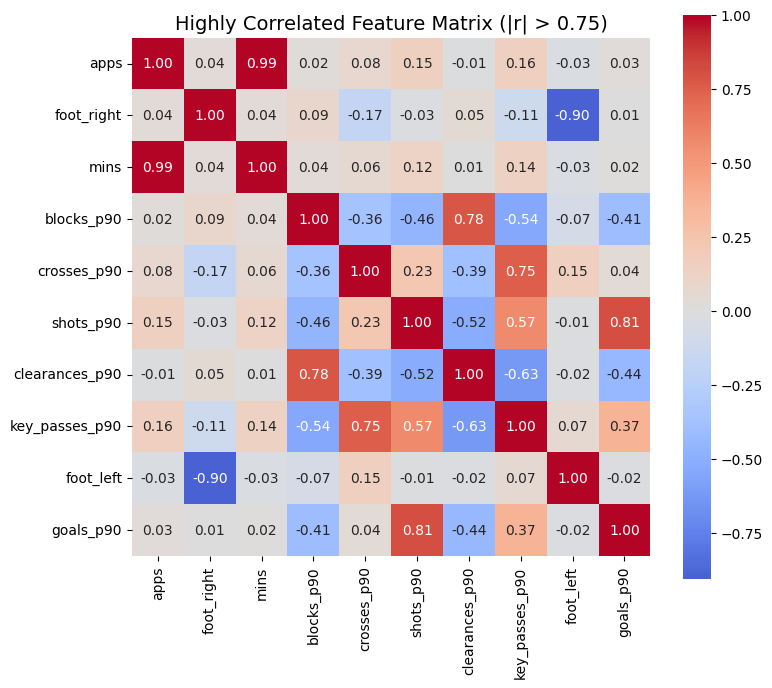

In [217]:
threshold = 0.75
high_corr_pairs = corr.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs) > threshold) & (abs(high_corr_pairs) < 1)]

# Extract relevant features
high_corr_features = list(
    set(high_corr_pairs.index.get_level_values(0)).union(
        set(high_corr_pairs.index.get_level_values(1))
    )
)

print("Highly correlated features:", high_corr_features)

# Subset correlation matrix
corr_subset = corr.loc[high_corr_features, high_corr_features]

# Plot with Seaborn
plt.figure(figsize=(8, 7))
sns.heatmap(corr_subset, cmap='coolwarm', annot=True, fmt=".2f", center=0, square=True)
plt.title(f"Highly Correlated Feature Matrix (|r| > {threshold})", fontsize=14)
plt.tight_layout()
plt.show()

In [218]:
# Deleting highly correlated features

df_clean = df_clean.drop(columns=["apps"])

In [219]:
display(df_clean.head(2))

,name,age,position,mins,ps%,rating,season,height,foot_both,foot_left,foot_right,goals_p90,assists_p90,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90
0,Arjen Robben,26.0,FW,1779.0,80.2,8.18,2009/2010,180.0,0.0,1.0,0.0,0.809444,0.303541,0.910624,0.0,3.096121,0.364250,0.546374,0.455312,0.819562,0.00000,0.637437,0.000000,0.0,1.639123,3.642496,2.003373,0.273187,1.91231,0.0,31.234401,1.365936,1.821248,0.182125
1,Stefan Kieling,26.0,FW,2924.0,72.4,7.79,2009/2010,191.0,0.0,0.0,1.0,0.646375,0.153899,3.047196,0.0,3.047196,2.133037,1.218878,0.711012,2.539330,0.30472,0.507866,0.101573,0.0,1.625171,1.117305,3.148769,1.828317,2.23461,0.0,33.011286,0.203146,0.406293,0.101573


### Data processing (continued)



In [220]:
#cols_to_drop2 = ["name", "position", "apps", "season", "mins"]
#df2 = df.drop(columns=cols_to_drop2)
#list(df2.columns)

In [221]:
df_clean.shape

(4769, 34)

In [222]:
# Split data

df_train, df_test = train_test_split(df_clean, test_size=0.02, random_state=42)

print("Shape train: " + str(df_train.shape[0]))
print("Shape test: " + str(df_test.shape[0]))

Shape train: 4673
Shape test: 96


In [223]:

exclude_cols = ["name", "position", "season", "rating", "mins", "height", "age", "yel_p90", "red_p90", "offsides_p90",
                "foot_both", "foot_left", "foot_right", "aerials_won_p90", "fouls_p90", "dribbled_p90",
                 "avg_passes_p90", "own_goals_p90", "through_passes_p90", "long_passes_p90", "dribblings_p90", "fouled_p90"]


# exclude_cols = ["name", "position", "season", "rating", "mins", "height", "age", "ps%", "yel_p90", "red_p90", "tackles_p90", "offsides_p90",
#                 "foot_both", "foot_left", "foot_right", "poss_losses_p90", "bad_controls_p90", "aerials_won_p90", "fouls_p90", "dribbled_p90",
#                 "blocks_p90", "avg_passes_p90", "own_goals_p90", "through_passes_p90", "long_passes_p90", "dribblings_p90", "fouled_p90"]

X = df_train.drop(columns=exclude_cols)


In [224]:
X.head(10)

,ps%,goals_p90,assists_p90,shots_p90,tackles_p90,interceptions_p90,clearances_p90,blocks_p90,key_passes_p90,poss_losses_p90,bad_controls_p90,crosses_p90
3464,87.5,0.034803,0.104408,0.755220,1.941995,2.049884,3.668213,0.647332,0.323666,0.215777,0.539443,0.000000
10430,84.7,0.029450,0.058901,0.801047,3.104058,3.404450,1.101440,0.200262,0.700916,0.901178,0.700916,0.000000
4261,83.9,0.191898,0.191898,2.916844,1.579957,1.093817,1.458422,0.121535,1.823028,0.850746,1.701493,0.243070
14955,77.1,0.026424,0.000000,0.401644,1.204932,2.008221,10.241926,0.502055,0.200822,0.200822,0.401644,0.000000
4708,78.2,0.089197,0.000000,0.490585,2.649158,3.139742,1.864222,0.196234,0.490585,0.883053,0.000000,0.490585
5421,88.8,0.167286,0.167286,0.828067,0.828067,0.552045,0.000000,0.000000,0.920074,1.012082,0.736059,0.920074
10431,79.0,0.114943,0.000000,0.517241,3.827586,3.103448,4.655172,0.310345,0.206897,1.551724,0.724138,0.517241
5342,85.3,0.000000,0.084507,1.977465,3.076056,2.307042,0.219718,0.109859,2.197183,3.405634,1.318310,0.878873
16102,75.5,0.000000,0.055556,0.500000,3.200000,2.400000,4.700000,0.300000,0.600000,0.800000,0.600000,0.400000
2661,85.7,0.205882,0.058824,1.400000,1.500000,1.600000,5.700000,0.600000,0.400000,0.000000,0.300000,0.000000


In [225]:
print(X.shape)
X.info()


(4673, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 4673 entries, 3464 to 3465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ps%                4673 non-null   float64
 1   goals_p90          4673 non-null   float64
 2   assists_p90        4673 non-null   float64
 3   shots_p90          4673 non-null   float64
 4   tackles_p90        4673 non-null   float64
 5   interceptions_p90  4673 non-null   float64
 6   clearances_p90     4673 non-null   float64
 7   blocks_p90         4673 non-null   float64
 8   key_passes_p90     4673 non-null   float64
 9   poss_losses_p90    4673 non-null   float64
 10  bad_controls_p90   4673 non-null   float64
 11  crosses_p90        4673 non-null   float64
dtypes: float64(12)
memory usage: 474.6 KB


In [226]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [227]:
#display(df_train_scaled.head(100))
print(X_scaled[:5])  # first 5 rows

# Every feature should have a mean of ≈0
print("\nTrain means:", X_scaled.mean(axis=0))

# Every feature should have a standard deviation of 1
print("\nTrain stds :", X_scaled.std(axis=0))


[[ 1.00717899 -0.69679238 -0.2112539  -0.55090984  0.080676    0.4453369
   0.52184284  1.33858391 -0.94646678 -1.03755145 -0.54887197 -0.84251515]
 [ 0.65926744 -0.72069655 -0.56629209 -0.508376    1.25694373  1.7421463
  -0.50236551 -0.25388098 -0.45131387 -0.1639611  -0.34532418 -0.84251515]
 [ 0.55986414  0.00478755  0.47131092  1.45539118 -0.28578769 -0.46996504
  -0.35992041 -0.5343054   1.02149271 -0.22823982  0.91597028 -0.44202974]
 [-0.2850639  -0.73421191 -1.02581599 -0.87907997 -0.66539703  0.40545016
   3.14492229  0.8211082  -1.10770315 -1.05661286 -0.72257697 -0.84251515]
 [-0.14838436 -0.4538688  -1.02581599 -0.79653019  0.79648285  1.48872515
  -0.1979959  -0.26822832 -0.72738056 -0.18706328 -1.22887674 -0.03422232]]

Train means: [ 5.62595361e-17  1.01875376e-16  7.75469281e-17  6.00608561e-17
 -1.57374648e-16 -2.73695041e-17  1.76381248e-16  1.15560128e-16
  7.45058721e-17  1.14039600e-18  8.36290402e-18 -1.26583956e-16]

Train stds : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

## **Training**:


### DBSCAN algorithm


In [228]:
# for eps in [0.5, 1, 2, 3, 5]:
#     db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
#     labels, counts = np.unique(db.labels_, return_counts=True)
#     print(f"eps={eps}: {dict(zip(labels, counts))}")


In [229]:
# db = DBSCAN(eps=2.8, min_samples=5).fit(X_scaled)
# print(np.unique(db.labels_, return_counts=True))

In [230]:
# score = silhouette_score(X_scaled, db.labels_)
# print(f"DBSCAN Silhouette: {score:.4f}")


### Elbow method for finding appropriate K value

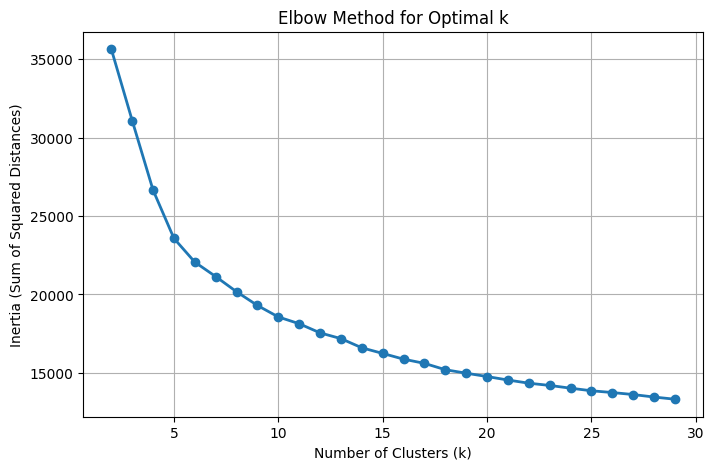

In [231]:
inertias = []
K = range(2, 30)  # test cluster numbers from 2 to 15

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'o-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

### K-means algorithm

In [232]:

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)




KMeans(n_clusters=7, random_state=42)

In [233]:
#display(df_train.head(20))

In [234]:

df_train['cluster'] = kmeans.labels_

### Analyzing the result

In [235]:
df_train['cluster'].value_counts().sort_index()



,count
cluster,
0,912
1,124
2,783
3,517
4,794
5,724
6,819


In [236]:
group2 = df_train[df_train["cluster"] == 2][["name", "position", "cluster"]]
group2["position"].value_counts(normalize=True) * 100



,proportion
position,
M,66.411239
FW,22.094508
AM,6.130268
DMC,3.192848
D,2.171137


In [237]:
display(group2.head(10))

,name,position,cluster
4261,Leon Goretzka,M,2
5421,Isaac Cuenca,M,2
5342,Ever Banega,M,2
4978,Ivan Rakitic,M,2
13398,Aleksandr Golovin,M,2
24670,Miguel Veloso,M,2
24673,Fabian Ruiz,M,2
14618,Adam Johnson,M,2
6161,Yacine Brahimi,M,2
8209,Sergio Canales,M,2


In [238]:

# group2_percentages = (
#     group2["position"]
#     .value_counts(normalize=True)
#     .mul(100)
#     .rename("proportion")
#     .reset_index()
#     .rename(columns={"index": "position"})
# )

# plt.figure(figsize=(8, 6))
# plt.barh(group2_percentages["position"], group2_percentages["proportion"])
# plt.xlabel("Percentage (%)")
# plt.ylabel("Position")
# plt.title("Position Distribution in Cluster 2")
# plt.gca().invert_yaxis()  # so the largest is on top
# plt.show()


In [239]:
df_clusters = df_train.groupby("cluster")["position"].value_counts(normalize=True).unstack().fillna(0)


In [240]:

# for cluster_id, row in df_clusters.iterrows():
#     print(f"\nCluster {cluster_id}")
#     top3 = row.nlargest(3) * 100  # convert to percentages
#     for position, pct in top3.items():
#         print(f"  {position}: {pct:.2f}%")


In [241]:
clusters_per_line = 5
# Create text blocks for each cluster
blocks = []
for cluster_id, row in df_clusters.iterrows():
    top3 = row.nlargest(3) * 100
    lines = [f"Cluster {cluster_id}"] + [f"  {pos}: {pct:.2f}%" for pos, pct in top3.items()]
    block = "\n".join(lines)
    blocks.append(block)

# Padding width for alignment
max_width = max(len(block.split("\n")[0]) for block in blocks) + 10

# Print horizontally formatted clusters
for i in range(0, len(blocks), clusters_per_line):
    row_blocks = blocks[i:i + clusters_per_line]

    # Split into lines per block and pad each line for alignment
    split_blocks = [b.split("\n") for b in row_blocks]
    max_lines = max(len(b) for b in split_blocks)
    for line_idx in range(max_lines):
        line_parts = []
        for block in split_blocks:
            if line_idx < len(block):
                line_parts.append(block[line_idx].ljust(max_width))
            else:
                line_parts.append("".ljust(max_width))
        print("".join(line_parts))
    print()



Cluster 0          Cluster 1          Cluster 2          Cluster 3          Cluster 4          
  D: 91.23%          GK: 97.58%         M: 66.41%          FW: 57.64%         M: 66.62%        
  DMC: 6.69%         D: 0.81%           FW: 22.09%         M: 31.14%          D: 22.04%        
  M: 2.08%           FW: 0.81%          AM: 6.13%          AM: 10.83%         DMC: 10.83%      

Cluster 5          Cluster 6          
  M: 62.57%          FW: 94.02%       
  DMC: 18.51%        M: 3.91%         
  D: 16.85%          AM: 2.08%        



In [242]:
df_clusters

position,AM,D,DMC,FW,GK,M
cluster,,,,,,
0,0.000000,0.912281,0.066886,0.000000,0.000000,0.020833
1,0.000000,0.008065,0.000000,0.008065,0.975806,0.008065
2,0.061303,0.021711,0.031928,0.220945,0.000000,0.664112
3,0.108317,0.000000,0.003868,0.576402,0.000000,0.311412
4,0.001259,0.220403,0.108312,0.003778,0.000000,0.666247
5,0.001381,0.168508,0.185083,0.016575,0.002762,0.625691
6,0.020757,0.000000,0.000000,0.940171,0.000000,0.039072


In [243]:

scores = {}
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score
    print(f"k={k}, silhouette={score:.4f}")

k=2, silhouette=0.3238
k=3, silhouette=0.2450
k=4, silhouette=0.2152
k=5, silhouette=0.2421
k=6, silhouette=0.2090
k=7, silhouette=0.1855
k=8, silhouette=0.1652
k=9, silhouette=0.1603
k=10, silhouette=0.1554
k=11, silhouette=0.1503
k=12, silhouette=0.1504
k=13, silhouette=0.1437
k=14, silhouette=0.1460
k=15, silhouette=0.1394


In [244]:


# Suppose you used KMeans or another clustering algorithm earlier
# X = your features (e.g., df_train[["goals_p90", "assists_p90", ...]])
# labels = df_train["cluster"]

score = silhouette_score(X_scaled, df_train["cluster"])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.1855


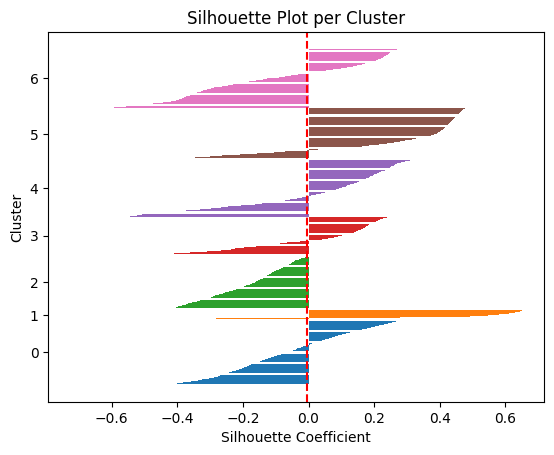

In [245]:


silhouette_vals = silhouette_samples(X, df_train["cluster"])
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i in np.unique(df_train["cluster"]):
    cluster_silhouette_vals = silhouette_vals[df_train["cluster"] == i]
    cluster_silhouette_vals.sort()
    y_ax_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper),
             cluster_silhouette_vals, edgecolor='none')
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(X, df_train["cluster"]), color="red", linestyle="--")
plt.yticks(yticks, np.unique(df_train["cluster"]))
plt.ylabel("Cluster")
plt.xlabel("Silhouette Coefficient")
plt.title("Silhouette Plot per Cluster")
plt.show()



In [246]:
#display(df_train[["name", "position", "cluster"]].head(120))

In [247]:
'cluster' in df_train.columns
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4673 entries, 3464 to 3465
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                4673 non-null   object 
 1   age                 4673 non-null   float64
 2   position            4673 non-null   object 
 3   mins                4673 non-null   float64
 4   ps%                 4673 non-null   float64
 5   rating              4673 non-null   float64
 6   season              4673 non-null   object 
 7   height              4673 non-null   float64
 8   foot_both           4673 non-null   float64
 9   foot_left           4673 non-null   float64
 10  foot_right          4673 non-null   float64
 11  goals_p90           4673 non-null   float64
 12  assists_p90         4673 non-null   float64
 13  yel_p90             4673 non-null   float64
 14  red_p90             4673 non-null   float64
 15  shots_p90           4673 non-null   float64
 16  aerials_

In [248]:
position_distribution = df_train.groupby('cluster')['position'].value_counts(normalize=True).unstack().fillna(0)
display(position_distribution.round(2))


position,AM,D,DMC,FW,GK,M
cluster,,,,,,
0,0.00,0.91,0.07,0.00,0.00,0.02
1,0.00,0.01,0.00,0.01,0.98,0.01
2,0.06,0.02,0.03,0.22,0.00,0.66
3,0.11,0.00,0.00,0.58,0.00,0.31
4,0.00,0.22,0.11,0.00,0.00,0.67
5,0.00,0.17,0.19,0.02,0.00,0.63
6,0.02,0.00,0.00,0.94,0.00,0.04
